In [74]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

from random import random

In [85]:
# show example image
img_dir = './img_sample2.JPG'

img = cv2.imread(img_dir, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plt.imshow(img)
# plt.show()

# x, y, w, h 
# x, y는 좌상단을 (0,0)으로 시작해서 우측으로 갈때마다 +, 아래로 갈때마다 + (matplot 좌표와 같음)
boxes = [[1770, 1756, 78, 32], [2044, 1608, 66, 16], [1798, 1608, 64, 18], [1826, 1584, 88, 22], [2012, 1534, 48, 14],
        [2306, 1504, 58, 14],[1770, 1756, 78, 32], [2044, 1608, 66, 16], [1798, 1608, 64, 18]]

In [76]:
# fig, ax = plt.subplots(1, 1, figsize=(16, 8))

# red_color = (255, 0, 0)
# for box in boxes:
# # 좌표위치는 좌상단점<x,y> ~ 우하단점<x,y> (시작점 ~ 끝점)
# # 마지막 숫자는 선 두께
#     cv2.rectangle(img, (box[0], box[1]), (box[0]+box[2], box[1]+box[3]), red_color, 2)


# ax.set_axis_off()
# ax.imshow(img)

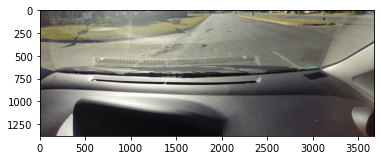

In [77]:
x = img.shape[1]
y = img.shape[0]

cropped_image = img[img.shape[0]//2:, :img.shape[1]]

plt.imshow(cropped_image)
plt.show()

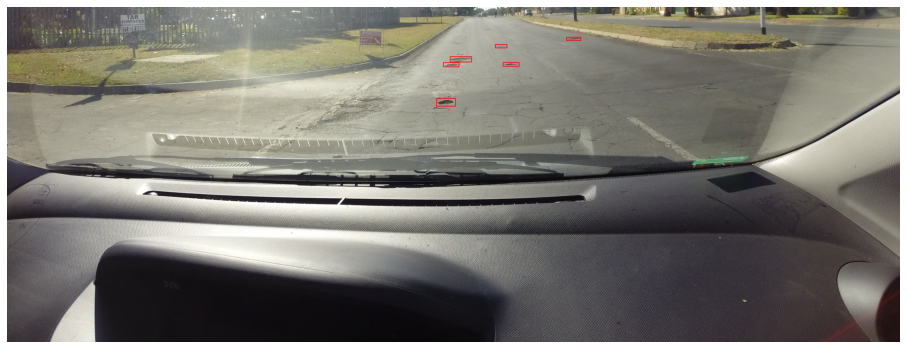

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

red_color = (255, 0, 0)
for box in boxes:
    cv2.rectangle(cropped_image, (box[0], box[1]-img.shape[0]//2), (box[0]+box[2], box[1]+box[3]-img.shape[0]//2), red_color, 2)


ax.set_axis_off()
ax.imshow(cropped_image)

In [95]:
def preprocessing_image(image, boxes):
    x,y = image.shape[1], image.shape[0]
    
    # refine boxes
    result_boxes = []
    for box in boxes:
        # if w,h too small, skip
        if box[3] < 10 or box[4] < 10:
            continue
        result_boxes.append(box)
    
    # horizontal crop image and boxes
    cropped_image = image[image.shape[0]//2:, :image.shape[1]]
    for box in result_boxes:
        box[1] = box[1] - img.shape[0]//2 # y min
    
    result_boxes = np.array(result_boxes)

    return cropped_image, boxes

In [102]:
img_dir = './img_sample2.JPG'

img = cv2.imread(img_dir, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

boxes = [[1770, 1756, 78, 32], [2044, 1608, 66, 16], [1798, 1608, 64, 18], [1826, 1584, 88, 22], [2012, 1534, 48, 14],
        [2306, 1504, 58, 14],[1770, 1756, 78, 32], [2044, 1608, 66, 16], [1798, 1608, 64, 18]]

a,b = preprocessing_image(img, boxes)

In [103]:
b

[[1770, 376, 78, 32],
 [2044, 228, 66, 16],
 [1798, 228, 64, 18],
 [1826, 204, 88, 22],
 [2012, 154, 48, 14],
 [2306, 124, 58, 14],
 [1770, 376, 78, 32],
 [2044, 228, 66, 16],
 [1798, 228, 64, 18]]

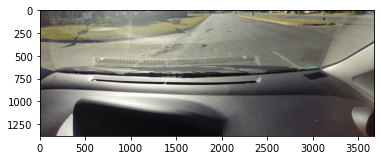

In [104]:
plt.imshow(a)
plt.show()